# QuadPay Machine Learning Engineer Assignment

In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [32]:
# load data
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,True,626,26,95407,95407,1.0,1,1.0,1.0
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,True,603,20,85007,85007,1.0,1,1.0,1.0
2,381AFF,793FE0,2526E8,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,True,648,41,30305-2646,30305-2646,1.0,1,1.0,1.0
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,True,625,33,28562,28562,1.0,1,1.0,1.0
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,True,438,18,92324,92324,1.0,1,1.0,1.0


In [33]:
# count unique order_id, customer_id and merchant_id
print('{} Unique Orders'.format(orders['order_id'].nunique()))
print('{} Unique Customers'.format(orders['customer_id'].nunique()))
print('{} Unique Merchants'.format(orders['merchant_id'].nunique()))

9996 Unique Orders
8934 Unique Customers
105 Unique Merchants


In [34]:
# Look at non unique orders
orders[orders.duplicated(['order_id'], keep=False)].sort_values(by=['order_id'])

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
1134,0072E2,AB49AC,C37828,53.92,2018-09-18 20:05:32.107,2018-09-18 20:05:33.793,True,571,35,23192,23192,1.0,1,1.0,1.0
4629,0072E2,6C16F5,6881F9,313.60,2018-09-14 15:12:53.983,2018-09-14 15:12:54.953,True,655,35,63461,63461,1.0,1,1.0,1.0
302,3BE8CD,8042BB,8D665E,108.00,2018-09-27 18:36:51.503,2018-09-27 18:36:51.970,True,764,30,98126,98126,1.0,1,1.0,1.0
5794,3BE8CD,078E13,26ECA2,30.86,2018-10-04 17:56:56.673,2018-10-04 17:56:57.033,True,450,20,10009,10009,1.0,1,1.0,1.0
90,5F2B62,756389,26ECA2,63.66,2018-09-09 23:57:07.197,2018-09-09 23:57:08.587,True,693,24,11432,11432,1.0,1,1.0,1.0
6442,5F2B62,5189CD,E3FFE5,301.41,2018-08-31 19:00:54.030,2018-08-31 19:00:55.203,True,596,32,32224,32224,1.0,1,1.0,1.0
3762,E62664,1F2937,B8CF53,199.00,2018-09-15 20:31:29.543,2018-09-15 20:31:30.577,True,701,49,19027-2644,19027-2644,1.0,1,1.0,1.0
6119,E62664,A68EE5,6F498E,42.23,2018-09-24 23:11:50.683,2018-09-24 23:11:52.263,True,611,19,21801,21801,1.0,1,1.0,1.0


The orders with non-unique order_ids seem to acutally be unique orders. Possibly the id was just a has generated for the assignment? I'll continue to use these orders.

[Text(0,0.5,'Count'), [], Text(0.5,1,'Orders Per Merchant')]

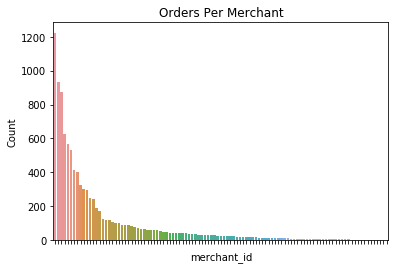

In [59]:
# Plot some categorical features
plot_df = orders.groupby('merchant_id').count()
plot_df.reset_index(inplace=True)
plot_df = plot_df.sort_values(by=['order_id'], ascending=False)
ax = sns.barplot(x='merchant_id', y='order_id', data=plot_df)
ax.set(xticklabels=[], ylabel='Count', title='Orders Per Merchant')

[Text(0,0.5,'Count'), Text(0.5,1,'Orders By Approval Type')]

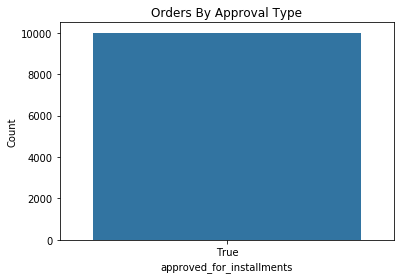

In [70]:
plot_df = orders.groupby('approved_for_installments').count()
plot_df.reset_index(inplace=True)
plot_df = plot_df.sort_values(by=['order_id'], ascending=False)
ax = sns.barplot(x='approved_for_installments', y='order_id', data=plot_df)
ax.set(ylabel='Count', title='Orders By Approval Type')

All orders approved for installments

[Text(0,0.5,'Count'), Text(0.5,1,'Orders By Credit Score')]

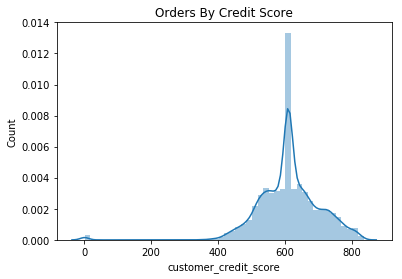

In [74]:
ax = sns.distplot(orders['customer_credit_score'])
ax.set(ylabel='Density', title='Orders By Credit Score')

In [73]:
# big jump around 600, possibly 611 is an inferred number?
orders['customer_credit_score'].value_counts().head()

611    1728
524      68
650      52
1        49
655      49
Name: customer_credit_score, dtype: int64

[Text(0,0.5,'Count'), Text(0.5,1,'Orders By Customer Age')]

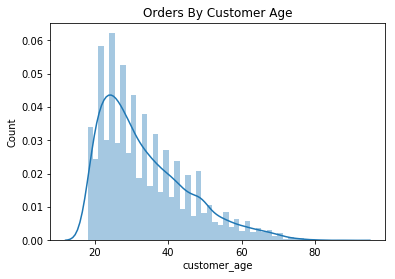

In [75]:
ax = sns.distplot(orders['customer_age'])
ax.set(ylabel='Density', title='Orders By Customer Age')

Log normal looking distribution for age.  Makes sense that younger people using the service.

# Feature Engineering

In [91]:
# check null values for paid installments
orders[['paid_installment_1', 'paid_installment_2', 'paid_installment_3', 'paid_installment_4']].isna().sum()

paid_installment_1      2
paid_installment_2      0
paid_installment_3      4
paid_installment_4    577
dtype: int64

From what I know of the rate of people misisng payments on quadpay the final installments NA's are likely not recorded yet rather than missed payments.

In [96]:
# Look at how people pay off installments with groupby
orders.groupby(['paid_installment_1', 'paid_installment_2', 'paid_installment_3', 'paid_installment_4']).size()

paid_installment_1  paid_installment_2  paid_installment_3  paid_installment_4
1.0                 0                   0.0                 0.0                    140
                                                            1.0                     19
                                        1.0                 0.0                     23
                                                            1.0                     27
                    1                   0.0                 0.0                    161
                                                            1.0                     57
                                        1.0                 0.0                    238
                                                            1.0                   8752
dtype: int64

Some people will miss an installment and then pay after that.  I would think that means they settle whatever problem they had with the previous installment, but it is still not preferable.

I'll create a new feature for paying all installments:

paid_installment_all:
{1: all installments paid for order, 0: at least 1 installment missed}

In [107]:
orders['paid_installment_all'] = np.where(orders['paid_installment_1'] + orders['paid_installment_2'] + 
                                          orders['paid_installment_3'] + orders['paid_installment_4'] == 4,
                                          1, 0)
orders.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,paid_installment_all
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,True,626,26,95407,95407,1.0,1,1.0,1.0,1
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,True,603,20,85007,85007,1.0,1,1.0,1.0,1
2,381AFF,793FE0,2526E8,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,True,648,41,30305-2646,30305-2646,1.0,1,1.0,1.0,1
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,True,625,33,28562,28562,1.0,1,1.0,1.0,1
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,True,438,18,92324,92324,1.0,1,1.0,1.0,1


In [110]:
# cheack where it should be wrong
orders.sort_values(by=['paid_installment_all'], ascending=True).head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,paid_installment_all
8673,AEAFA4,98153E,C37828,80.96,2018-10-02 14:45:06.883,2018-10-02 14:45:07.273,True,495,22,80211,80219,1.0,1,1.0,0.0,0
8578,7CBC58,4B5FF9,3CF686,69.15,2018-09-03 03:08:59.037,2018-09-03 03:09:00.193,True,460,57,18229,18229,1.0,1,0.0,1.0,0
4098,760C2C,85BD4C,9C0B17,39.60,2018-10-13 22:39:29.853,2018-10-13 22:39:30.227,True,718,28,28277,28277,1.0,1,1.0,NaN,0
4101,86C05E,62B682,24FBAF,166.00,2018-10-12 17:34:35.633,2018-10-12 17:34:36.430,True,428,40,93311,93311,1.0,1,1.0,NaN,0
4102,7B9A06,EB13CB,ED5D01,129.99,2018-09-03 21:32:44.747,2018-09-03 21:32:45.967,True,511,38,95123,95054,1.0,0,0.0,0.0,0


### Time Feature Engineering

In [139]:
# Solely using checkout_started_at
# make features for DOW and decimal hour of day
orders['checkout_started_at'] = pd.to_datetime(orders['checkout_started_at'])
orders['dow'] = orders['checkout_started_at'].dt.day_name()
orders['dow_numeric'] = orders['checkout_started_at'].dt.dayofweek
print(orders['dow'].head())
print(orders['dow_numeric'].head())

0    Wednesday
1       Friday
2     Saturday
3    Wednesday
4    Wednesday
Name: dow, dtype: object
0    2
1    4
2    5
3    2
4    2
Name: dow_numeric, dtype: int64


In [131]:
orders['hour'] = orders['checkout_started_at'].dt.hour
orders['hour'].head()

0    14
1    16
2    13
3     0
4    22
Name: hour, dtype: int64

In [132]:
orders['minute_dec'] = orders['checkout_started_at'].dt.minute / 60
orders['minute_dec'].head()

0    0.433333
1    0.916667
2    0.683333
3    0.983333
4    0.883333
Name: minute_dec, dtype: float64

In [133]:
orders['hour_dec'] = orders['hour'] + orders['minute_dec']
orders['hour_dec'].head()

0    14.433333
1    16.916667
2    13.683333
3     0.983333
4    22.883333
Name: hour_dec, dtype: float64

[Text(0,0.5,'Count'), Text(0.5,1,'Orders by Day of Week')]

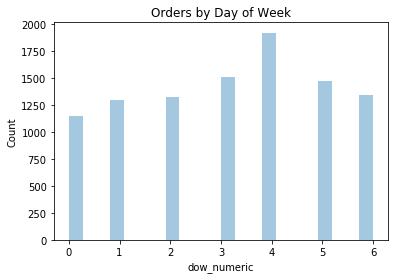

In [145]:
# Plot DOW hist
ax = sns.distplot(orders['dow_numeric'], kde=False)
ax.set(ylabel='Count', title='Orders by Day of Week')
# 0 indexed, with Monday as day 0

[Text(0,0.5,'Count'), Text(0.5,1,'Orders by Hour')]

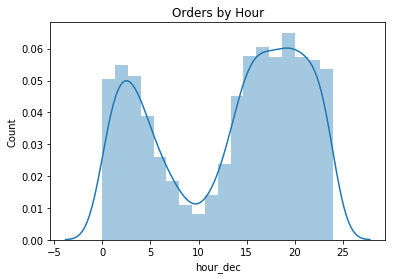

In [147]:
# Plot hour 
ax = sns.distplot(orders['hour_dec'])
ax.set(ylabel='Count', title='Orders by Hour')

In [175]:
# One location idea, feature for if zipcodes are the same for shipping and billing
orders['zip_match'] = np.where(orders['customer_billing_zip'] == orders['customer_shipping_zip'], 1, 0)

In [176]:
# Feature for if customer has not made all 4 payments before

# helper funciton to determine if order is customers first
def not_first(row, df):
    customer_orders = df[df['customer_id'] == row['customer_id']]
    if row['checkout_started_at'] == customer_orders['checkout_started_at'].min():
        return(0)
    else:
        return(1)

In [177]:
orders['return_customer'] = orders.apply(lambda row: not_first(row, orders), axis = 1)

In [187]:
orders['previous_customer_missed'] = np.where((orders['return_customer'] == 1) &
                                              (orders['paid_installment_all'] == 0), 1, 0)

In [190]:
orders.sort_values(by=['customer_id']).head(30)

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,...,paid_installment_4,paid_installment_all,dow,hour,minute_dec,hour_dec,dow_numeric,zip_match,previous_customer_missed,return_customer
4074,E128F5,0005F1,8B9AB8,297.00,2018-09-27 13:58:34.243,2018-09-27 13:58:34.523,True,711,25,34266,...,1.0,1,Thursday,13,0.966667,13.966667,3,1,0,1
9814,E4BBCD,0005F1,8B9AB8,169.00,2018-08-30 22:39:26.397,2018-08-30 22:39:27.757,True,711,25,34266,...,1.0,1,Thursday,22,0.650000,22.650000,3,1,0,0
9166,A39F4B,0008C3,8D665E,109.00,2018-09-08 04:20:36.700,2018-09-08 04:20:37.950,True,588,35,89183,...,1.0,1,Saturday,4,0.333333,4.333333,5,1,0,0
3884,BFFC42,000A1F,944AC9,1036.78,2018-09-28 15:38:18.650,2018-09-28 15:38:18.947,True,624,21,16117,...,1.0,1,Friday,15,0.633333,15.633333,4,0,0,0
3104,A91B2B,000B25,26ECA2,58.06,2018-09-11 02:20:55.423,2018-09-11 02:20:56.530,True,611,19,32817,...,1.0,1,Tuesday,2,0.333333,2.333333,1,0,0,0
4753,E68844,000BD5,E3FFE5,195.14,2018-09-21 13:40:35.743,2018-09-21 13:40:37.227,True,618,36,31324,...,1.0,1,Friday,13,0.666667,13.666667,4,1,0,0
8143,B8EB7A,000D24,8B9AB8,207.00,2018-09-16 15:05:18.953,2018-09-16 15:05:20.250,True,543,43,84094,...,1.0,1,Sunday,15,0.083333,15.083333,6,1,0,0
1490,CE3D89,000EEC,0ADC71,108.49,2018-09-29 15:52:47.543,2018-09-29 15:52:47.967,True,550,44,29223,...,1.0,1,Saturday,15,0.866667,15.866667,5,1,0,0
3088,F71935,001368,C37828,49.85,2018-09-07 22:30:22.447,2018-09-07 22:30:24.150,True,555,29,33472,...,1.0,1,Friday,22,0.500000,22.500000,4,1,0,0
7086,76AC92,001FDA,0B3A54,227.00,2018-10-14 17:32:21.170,2018-10-14 17:32:21.523,True,588,23,01841,...,1.0,1,Sunday,17,0.533333,17.533333,6,1,0,0


# Prepare Dataset for sklearn

In [238]:
# one hot encode merchant_id
merchant_id_ohc = pd.get_dummies(orders['merchant_id'], 'merchant_id',drop_first=True)

In [239]:
orders_big = pd.concat([orders, merchant_id_ohc], axis=1)

In [240]:
# key assumption here is that NA's are due to something being in progress
# Dropping all rows with NA's in payment columns
orders_big = orders_big.dropna(subset=['paid_installment_1', 'paid_installment_2', 
                               'paid_installment_3', 'paid_installment_4'], how='any')
print(orders_big.shape)
orders_big.columns.values

(9417, 128)


array(['order_id', 'customer_id', 'merchant_id', 'order_amount',
       'checkout_started_at', 'credit_decision_started_at',
       'approved_for_installments', 'customer_credit_score',
       'customer_age', 'customer_billing_zip', 'customer_shipping_zip',
       'paid_installment_1', 'paid_installment_2', 'paid_installment_3',
       'paid_installment_4', 'paid_installment_all', 'dow', 'hour',
       'minute_dec', 'hour_dec', 'dow_numeric', 'zip_match',
       'previous_customer_missed', 'return_customer',
       'merchant_id_01C9EC', 'merchant_id_01CF9F', 'merchant_id_03271F',
       'merchant_id_05BCA0', 'merchant_id_0ADC71', 'merchant_id_0AF5A1',
       'merchant_id_0B3A54', 'merchant_id_0FFBC9', 'merchant_id_1561AE',
       'merchant_id_1B2DD1', 'merchant_id_1C107C', 'merchant_id_1E187E',
       'merchant_id_24FBAF', 'merchant_id_2526E8', 'merchant_id_268696',
       'merchant_id_26ECA2', 'merchant_id_2826D3', 'merchant_id_2BB3C5',
       'merchant_id_311C16', 'merchant_id_32BC4E

In [241]:
# order all data by date
orders_big = orders_big.sort_values(by=['checkout_started_at'], ascending=True)
orders_big.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,...,merchant_id_EB60E6,merchant_id_ED5D01,merchant_id_F0BD4E,merchant_id_F158DD,merchant_id_F27D4E,merchant_id_F72922,merchant_id_FC0AD9,merchant_id_FDACE5,merchant_id_FEA2AC,merchant_id_FED86E
1520,E54A17,F68E1B,2BB3C5,64.00,2018-08-28 20:48:08.970,2018-08-28 20:48:10.533,True,769,24,90247,...,0,0,0,0,0,0,0,0,0,0
7318,F62087,9F3825,3B88C5,52.19,2018-08-28 20:49:14.113,2018-08-28 20:49:15.487,True,611,22,35405,...,0,0,0,0,0,0,0,0,0,0
4138,698A17,060224,26ECA2,36.52,2018-08-28 20:51:37.300,2018-08-28 20:51:38.630,True,779,28,91746,...,0,0,0,0,0,0,0,0,0,0
6390,4BB219,417C15,32BC4E,211.09,2018-08-28 20:57:54.273,2018-08-28 20:57:55.570,True,618,74,77024,...,0,0,0,0,0,0,0,0,0,0
6784,8ADC08,DEB1C6,8B9AB8,153.09,2018-08-28 21:03:04.693,2018-08-28 21:03:05.817,True,703,23,24060,...,0,0,0,0,0,0,0,0,0,0


In [242]:
# drop columns
orders_big = orders_big.drop(['order_id', 'customer_id', 'merchant_id',
       'checkout_started_at', 'credit_decision_started_at',
       'approved_for_installments','customer_billing_zip', 'customer_shipping_zip',
       'paid_installment_1', 'paid_installment_2', 'paid_installment_3','dow', 'hour',
       'minute_dec'], axis=1)

In [244]:
# Datasets for models
# y has 2 columns
y = orders_big[['paid_installment_all', 'paid_installment_4']]
X = orders_big.drop(['paid_installment_4', 'paid_installment_all'], axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Models

Making 2 models:

1. Predicting all 4 payments being made.
2. Predicting payment #4 being made.  Possibly if payment 4 is made this is still a good customer?

In [252]:
model_1 = RandomForestClassifier(n_estimators=100)

In [253]:
# model for all payments
model_1.fit(X_train, y_train['paid_installment_all'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [267]:
# predict for model_1
preds = model_1.predict(X_test)

In [268]:
# look at confusion matrix for these predictions
cm = confusion_matrix(y_test['paid_installment_all'], preds)

In [275]:
print(cm)
# order is TN, FP, FN, TP

[[  26  107]
 [   1 1750]]


In [276]:
print("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

Accuracy of prediction: 0.943


In [287]:
print("Percent Paid in Test Set:", round(1 - y_test['paid_installment_all'].value_counts()[0] / y_test['paid_installment_all'].value_counts().sum(), 3))

Percent Paid in Test Set: 0.929


In [292]:
# AUC is probably a better metric for a class imbalance like this
pred_probs = model_1.predict_proba(X_test)
roc = [p[1] for p in pred_probs]
print( roc_auc_score(y_test['paid_installment_all'], roc) )

0.7424887175105096


In [296]:
# Example of grid search, would look into more hyperparameters in practice
depth_list = [2, 3, 4, 5, 10, 15, 20]
auc_list = []
acc_list = []
for i in depth_list:
    model_1 = RandomForestClassifier(n_estimators=100, max_depth=i)
    model_1.fit(X_train, y_train['paid_installment_all'])
    pred_probs = model_1.predict_proba(X_test)
    roc = [p[1] for p in pred_probs]
    auc_list.append(roc_auc_score(y_test['paid_installment_all'], roc))
    preds =  model_1.predict(X_test)
    cm = confusion_matrix(y_test['paid_installment_all'], preds)
    acc_list.append((cm[0,0]+cm[1,1])/cm.sum())

Text(0,0.5,'AUC')

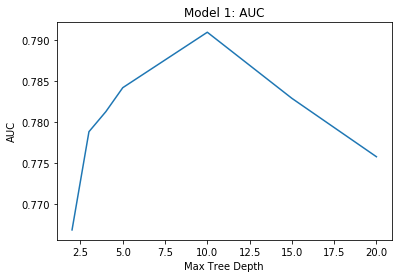

In [300]:
plt.plot(depth_list, auc_list)
plt.title("Model 1: AUC")
plt.xlabel('Max Tree Depth')
plt.ylabel('AUC')

Text(0,0.5,'Accuracy')

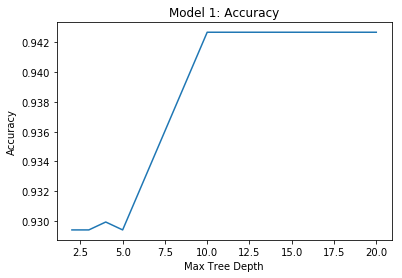

In [301]:
plt.plot(depth_list, acc_list)
plt.title("Model 1: Accuracy")
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')

In [299]:
# Now same for model 2

In [305]:
# Example of grid search, would look into more hyperparameters in practice
depth_list = [2, 3, 4, 5, 10, 15, 20]
auc_list = []
acc_list = []
for i in depth_list:
    model_2 = RandomForestClassifier(n_estimators=100, max_depth=i)
    model_2.fit(X_train, y_train['paid_installment_4'])
    pred_probs = model_2.predict_proba(X_test)
    roc = [p[1] for p in pred_probs]
    auc_list.append(roc_auc_score(y_test['paid_installment_4'], roc))
    preds =  model_2.predict(X_test)
    cm = confusion_matrix(y_test['paid_installment_4'], preds)
    acc_list.append((cm[0,0]+cm[1,1])/cm.sum())

Text(0,0.5,'AUC')

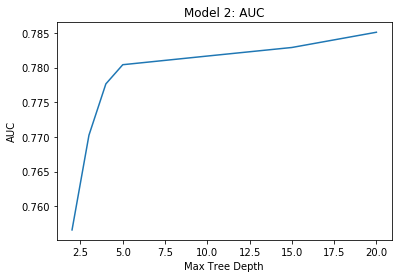

In [306]:
plt.plot(depth_list, auc_list)
plt.title("Model 2: AUC")
plt.xlabel('Max Tree Depth')
plt.ylabel('AUC')

Text(0,0.5,'Accuracy')

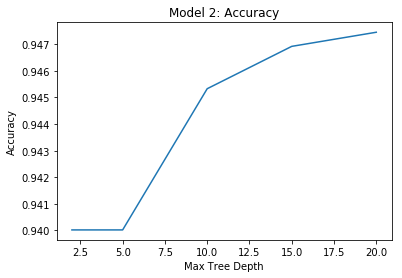

In [307]:
plt.plot(depth_list, acc_list)
plt.title("Model 2: Accuracy")
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')

In [308]:
print("Percent Paid in Test Set:", round(1 - y_test['paid_installment_4'].value_counts()[0] / y_test['paid_installment_4'].value_counts().sum(), 3))

Percent Paid in Test Set: 0.94
